In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df[df['SeniorCitizen'] == 1].shape[0] / df.SeniorCitizen.shape[0]

0.1621468124378816

In [5]:
for col in df.columns:
    print(col, df[col].unique())
    print(" ")

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 
gender ['Female' 'Male']
 
SeniorCitizen [0 1]
 
Partner ['Yes' 'No']
 
Dependents ['No' 'Yes']
 
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 
PhoneService ['No' 'Yes']
 
MultipleLines ['No phone service' 'No' 'Yes']
 
InternetService ['DSL' 'Fiber optic' 'No']
 
OnlineSecurity ['No' 'Yes' 'No internet service']
 
OnlineBackup ['Yes' 'No' 'No internet service']
 
DeviceProtection ['No' 'Yes' 'No internet service']
 
TechSupport ['No' 'Yes' 'No internet service']
 
StreamingTV ['No' 'Yes' 'No internet service']
 
StreamingMovies ['No' 'Yes' 'No internet service']
 
Contract ['Month-to-month' 'One year' 'Two year']
 
PaperlessBilling ['Yes' 'No']
 
PaymentMethod ['Electronic check' 'Mailed check' 'Bank tran

In [6]:
df.query('SeniorCitizen == 1 and Churn == "No"').shape[0] / df.SeniorCitizen.shape[0]

0.09456197643049837

In [7]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [8]:
df_sc = df.query('SeniorCitizen == 1 and Churn == "No"')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

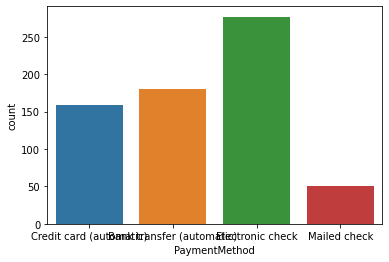

In [9]:
sns.countplot( data = df_sc, x= 'PaymentMethod')

In [10]:
df_nsc = df.query('SeniorCitizen == 0 and Churn == "No"')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

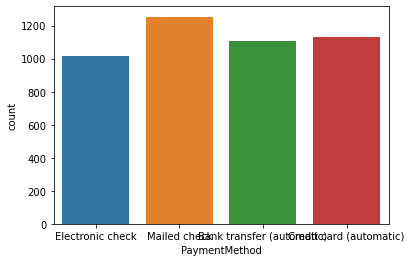

In [11]:
sns.countplot( data = df_nsc, x= 'PaymentMethod')

In [12]:
df.groupby('PaymentMethod')['MonthlyCharges'].sum().reset_index()

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),103745.45
1,Credit card (automatic),101231.85
2,Electronic check,180345.00
3,Mailed check,70794.30


In [13]:
df.query('Dependents == "Yes" and gender == "Male"').shape[0] / df.gender.shape[0]

0.153627715462161

In [3]:
df.query('Dependents == "Yes" and gender == "Female"').shape[0] / df.gender.shape[0]

0.1459605281840125

In [14]:
df.query('Dependents == "Yes"').shape[0] / df.gender.shape[0]

0.2995882436461735

In [15]:
df.query('Churn == "Yes"').shape[0] / df.Churn.shape[0]

0.2653698707936959

In [16]:
 df.query('Churn == "Yes"').tenure.mean()

17.979133226324237

In [21]:
df.query('Churn == "Yes" and tenure < 17.979133226324237').head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['TotalCharges'] = df['TotalCharges'].astype('float32')

    parts: Hendy
    Fawzy
    Sarah 
    Hossam
    Room 3

### this is for today's session Saturday Room2

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='tenure', ylabel='Contract'>

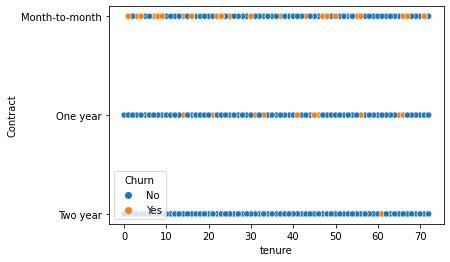

In [43]:
sns.scatterplot(x = df.tenure, y = df.Contract, hue = df.Churn)

In [57]:
a = df.query('Churn == "Yes" and Contract == "Month-to-month"').shape[0]/df.shape[0]
b = df.query('Contract == "Month-to-month"').shape[0]/df.shape[0]
total_churn_mtom = a*b
total_churn_mtom

0.12928684223677883

In [52]:
df[df['gender'] == 'Male'].Contract.value_counts()['One year'] / df[df['gender'] == 'Female'].Contract.value_counts()['One year']

1.051532033426184

In [30]:
df[df['gender'] == 'Male'].Contract.value_counts()['Two year'] / df[df['gender'] == 'Female'].Contract.value_counts()['Two year']

1.0059171597633136

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,c_yes,c_no,intercept
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,1,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,1


In [48]:
df[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(df['Contract'])
lm = sm.Logit(df['c_yes'], df[['intercept', 'One year', 'Two year']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.204489
         Iterations 8


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  c_yes   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                     inf
Time:                        21:22:48   Log-Likelihood:                -1440.2
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2937      0.032      9.044      0.000       0.230       0.357
One year       1.7698      0.089     19.983      0.000       1.596       1.943
Two year       3.2418      0.150     21.614      0.000       2.948       3.536
==============================================================================
"""

In [49]:
np.exp(1.7698)

5.869679308119565

In [62]:
dfc = df.query('Churn == "Yes"')
n_m = dfc.query('gender == "Male" and Contract == "One year"').shape[0]
n_m = np.int(n_m)
n_f = dfc.query('gender == "Female" and Contract == "One year"').shape[0]
n_f = np.int(n_f)
obs_dfc_m = dfc.query('gender == "Male" and Contract == "One year"').shape[0] / dfc.shape[0]
obs_dfc_f = dfc.query('gender == "Female" and Contract == "One year"').shape[0] / dfc.shape[0]
print('{} for males {} and for females'.format(dfc_m, dfc_f))
obs_diff = obs_dfc_m - obs_dfc_f

0.04868913857677903 for males 0.04012841091492777 and for females


C:\Users\user\AppData\Local\Temp\ipykernel_7612\158502477.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_m = np.int(n_m)
C:\Users\user\AppData\Local\Temp\ipykernel_7612\158502477.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

In [65]:
diffs = []
for _ in range(10000):
    male_sample = np.random.choice([1, 0], n_m, p = [obs_dfc_m, 1-obs_dfc_m]).mean()
    female_sample = np.random.choice([1, 0],  n_f, p = [obs_dfc_f, 1-obs_dfc_f]).mean()
    diff = male_sample - female_sample
    diffs.append(diff)
    
diffs = np.array(diffs)

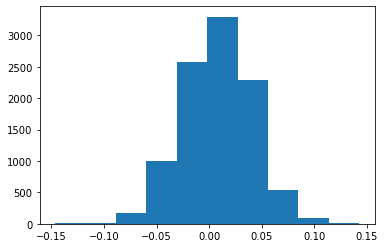

In [70]:
plt.hist(diffs);

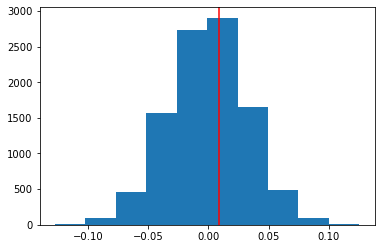

In [73]:
null_vals = np.random.normal(0, diffs.std(), 10000)
plt.hist(null_vals);
plt.axvline(obs_diff, c = 'r');

In [76]:
p_val = (null_vals > obs_diff).mean()
p_val

0.3967